In [1]:
# Loading the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

In [3]:
# Glimpse of the dataset
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [4]:
# Checking for any missing values
data.isnull().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

In [5]:
#Information about the variables and its types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null int64
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


Univariate Analysis of Categorical Features

In [6]:
data['Year'].nunique()

19

In [7]:
data['Year'].value_counts()

2015    572
2003    572
2008    572
2016    572
2001    572
2009    572
2017    572
2002    572
2010    572
2011    572
2007    572
2004    572
2012    572
2005    572
2013    572
2006    572
2014    572
1999    572
2000    572
Name: Year, dtype: int64

The dataset contains information for 19 years from 1999 to 2017 and each year has 572 data points

In [8]:
data['113 Cause Name'].nunique()

11

In [9]:
data['113 Cause Name'].value_counts()

Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     988
Cerebrovascular diseases (I60-I69)                                       988
Chronic lower respiratory diseases (J40-J47)                             988
Diabetes mellitus (E10-E14)                                              988
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    988
Alzheimer's disease (G30)                                                988
Malignant neoplasms (C00-C97)                                            988
All Causes                                                               988
Diseases of heart (I00-I09,I11,I13,I20-I51)                              988
Influenza and pneumonia (J09-J18)                                        988
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     988
Name: 113 Cause Name, dtype: int64

The dataset contains 11 Cause names and each cause name has 988 data points

In [10]:
data['Cause Name'].nunique()

11

In [11]:
data['Cause Name'].value_counts()

Alzheimer's disease        988
Cancer                     988
Kidney disease             988
Influenza and pneumonia    988
CLRD                       988
All causes                 988
Heart disease              988
Unintentional injuries     988
Stroke                     988
Diabetes                   988
Suicide                    988
Name: Cause Name, dtype: int64

We can see that the column "113 Cause Name" and "Cause Name" are nearly the same

In [12]:
data['State'].nunique()

52

In [13]:
data['State'].value_counts()

Oregon                  209
Indiana                 209
Pennsylvania            209
Alabama                 209
Tennessee               209
Arkansas                209
Delaware                209
Nebraska                209
Mississippi             209
Montana                 209
United States           209
Washington              209
Nevada                  209
Missouri                209
Alaska                  209
North Dakota            209
Maryland                209
Michigan                209
Georgia                 209
South Dakota            209
Illinois                209
Idaho                   209
Wisconsin               209
West Virginia           209
Utah                    209
Iowa                    209
South Carolina          209
Rhode Island            209
Texas                   209
Florida                 209
Minnesota               209
Kansas                  209
Louisiana               209
North Carolina          209
New York                209
Oklahoma            

The dataset contains information of a total of 52 states ad each state has 209 datapoints

Univariate analysis of Numerical features

In [14]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


Bi-Variate Analysis

In [15]:
data_mean = np.mean(data['Deaths'])
data_std = np.std(data['Deaths'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data['Deaths'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data['Deaths'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 57
Non-outlier observations: 10811


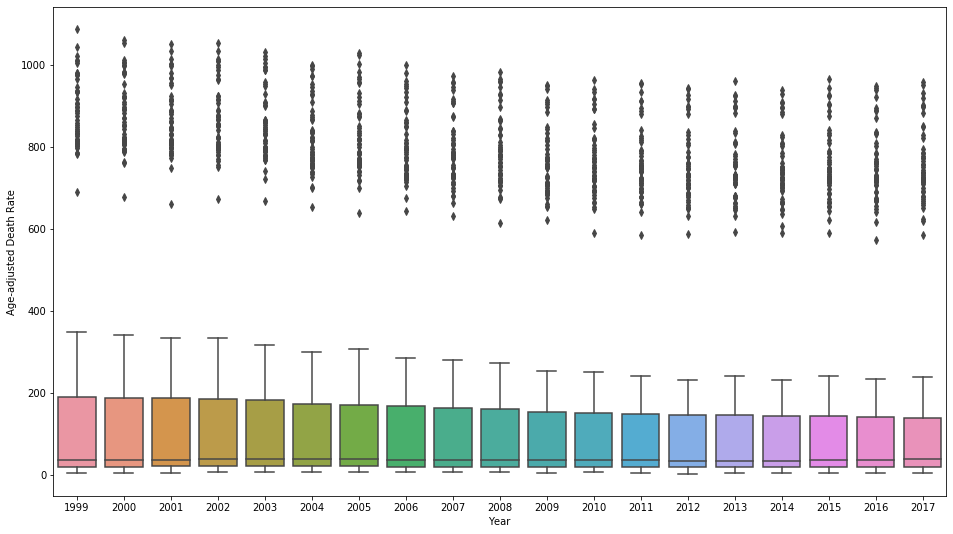

In [16]:
# Analyzing the 'year' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(16, 9))
sns.boxplot(data['Year'], data['Age-adjusted Death Rate'])

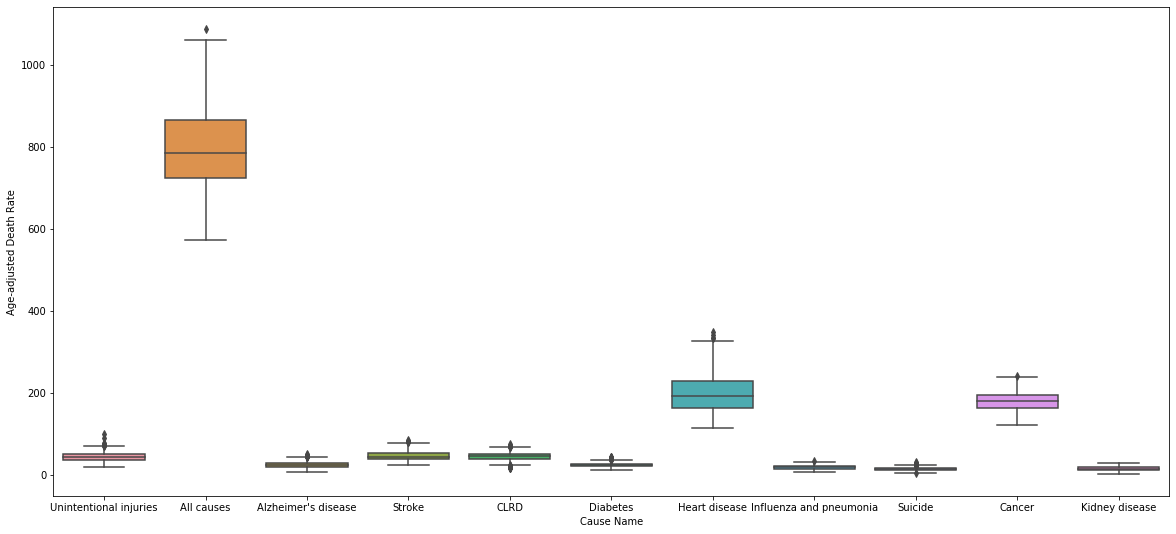

In [17]:
# Analyzing the 'Cause Name' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(20, 9))
sns.boxplot(data['Cause Name'], data['Age-adjusted Death Rate'])

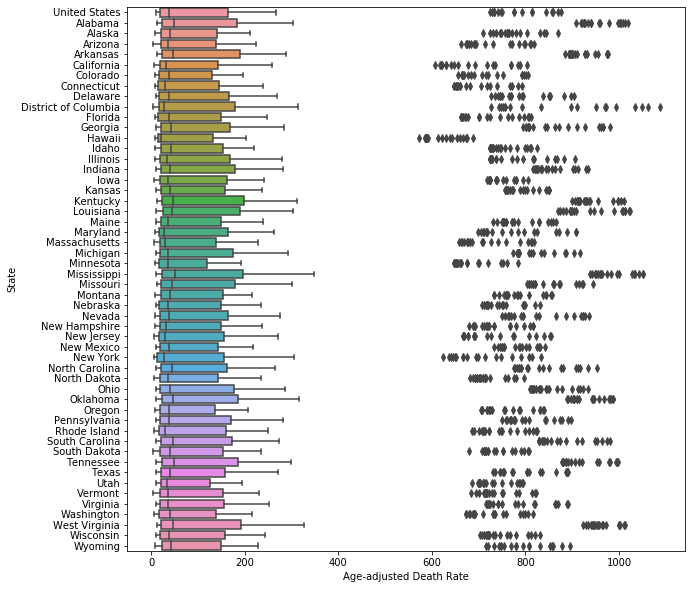

In [18]:
# Analyzing the 'State' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(10, 10))
sns.boxplot(data['Age-adjusted Death Rate'],data['State'])

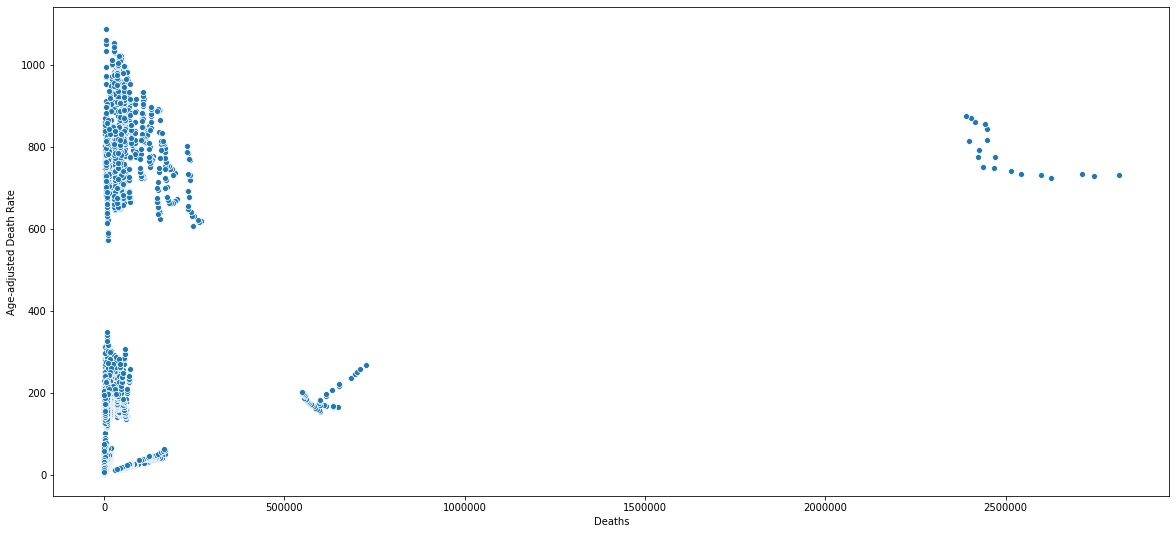

In [19]:
# Analyzing the 'Deaths' vs 'Age-adjusted Death Rate'
plt.figure(figsize=(20, 9))
sns.scatterplot(data['Deaths'], data['Age-adjusted Death Rate'])

In [20]:
# Mean 'Deaths' and 'Age-adjusted Death Rate' per year
df = data.groupby('Year').mean()
df[['Deaths', 'Age-adjusted Death Rate']]

,Deaths,Age-adjusted Death Rate
Year,,
1999,15025.262238,143.517657
2000,15054.353147,142.217133
2001,15090.150350,140.362762
2002,15252.657343,139.978497
2003,15246.164336,138.022203
2004,14901.216783,132.391958
2005,15167.825175,132.766434
2006,14968.321678,128.669231
2007,14930.115385,126.036713


In [21]:
# Mean 'Deaths' and 'Age-adjusted Death Rate' per Cause Name
df = data.groupby('Cause Name').mean()
df[['Deaths', 'Age-adjusted Death Rate']]

,Deaths,Age-adjusted Death Rate
Cause Name,,
All causes,96616.536437,798.633907
Alzheimer's disease,3025.943320,25.010223
CLRD,5252.888664,44.596862
Cancer,21950.696356,178.586134
Diabetes,2833.892713,23.393522
Heart disease,24742.186235,198.002935
Influenza and pneumonia,2215.872470,18.204757
Kidney disease,1738.082996,14.068927
Stroke,5519.277328,45.888563


In [22]:
# Mean 'Deaths' and 'Age-adjusted Death Rate' per State
df = data.groupby('State').mean()
df[['Deaths', 'Age-adjusted Death Rate']]

,Deaths,Age-adjusted Death Rate
State,,
Alabama,7672.416268,153.289474
Alaska,564.066986,122.824402
Arizona,7523.650718,117.020096
Arkansas,4724.665072,148.490909
California,39088.578947,112.487081
Colorado,4973.373206,113.485646
Connecticut,4693.909091,110.500957
Delaware,1220.167464,127.641148
District of Columbia,808.167464,137.261244


In [23]:
#data with united states only excluding all causes
df_US = data.loc[(data['State'] == 'United States') & (data['Cause Name'] != 'All causes')]

In [24]:
df_US= df_US.drop('Cause Name',axis = 1)

In [25]:
df_US.head()

,Year,113 Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",United States,169936,49.4
104,2017,Alzheimer's disease (G30),United States,121404,31.0
156,2017,Cerebrovascular diseases (I60-I69),United States,146383,37.6
208,2017,Chronic lower respiratory diseases (J40-J47),United States,160201,40.9
260,2017,Diabetes mellitus (E10-E14),United States,83564,21.5


In [26]:
death_year = df_US.groupby(['Year']).sum()
death_year

,Deaths,Age-adjusted Death Rate
Year,,
1999,1905826,698.1
2000,1902194,688.0
2001,1899358,675.7
2002,1918873,672.1
2003,1912115,658.8
2004,1864133,632.6
2005,1889981,628.8
2006,1854676,604.8
2007,1846301,590.3


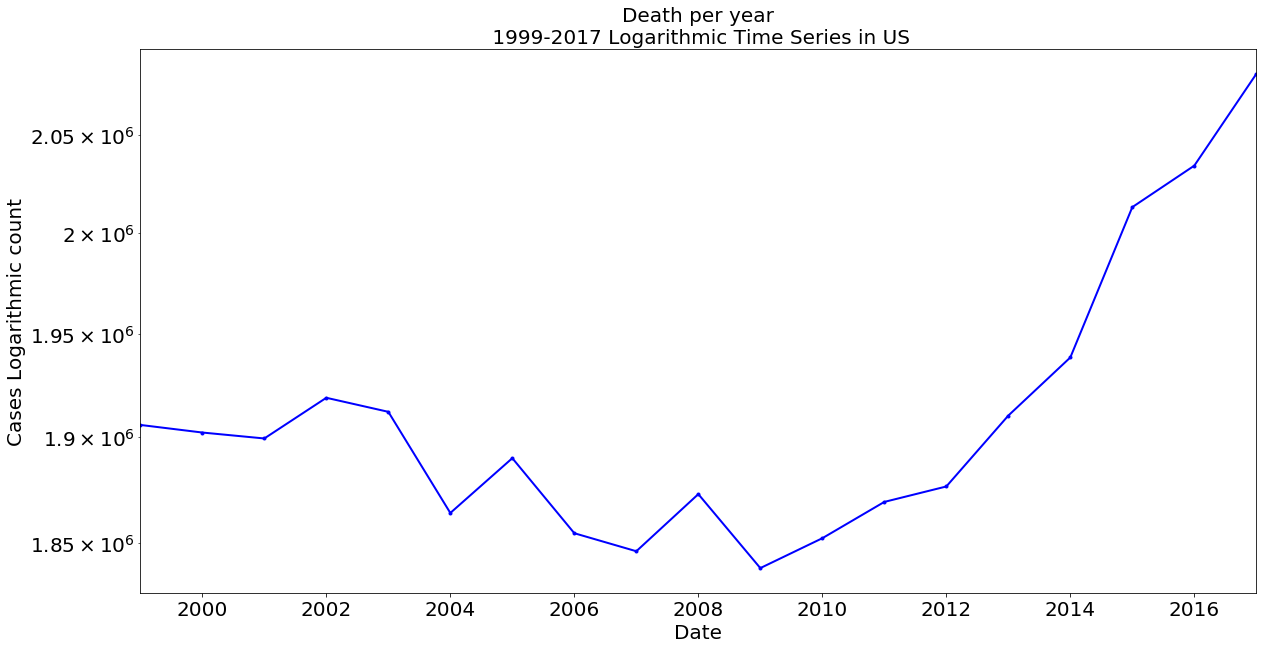

In [27]:
death_year['Deaths'].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Cases Logarithmic count', fontsize=20);
plt.title('Death per year\n 1999-2017 Logarithmic Time Series in US', fontsize=20);

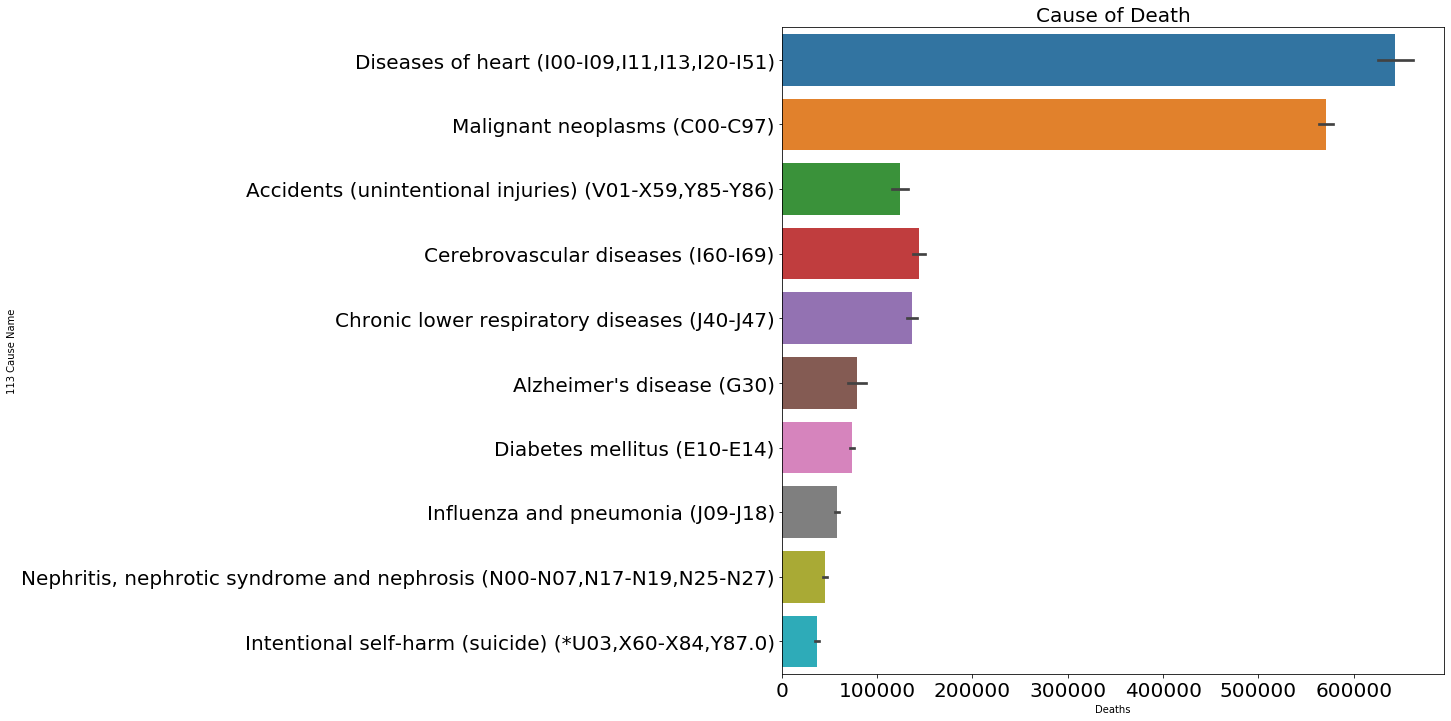

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x="Deaths", y="113 Cause Name", label='small', data=df_US.sort_values(by="Deaths",ascending=False))
plt.title('Cause of Death', fontsize=20)
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.show()

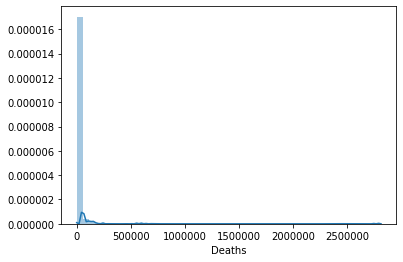

In [29]:
sns.distplot(data['Deaths'])

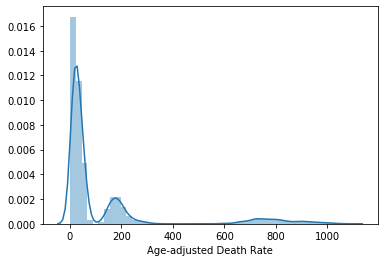

In [30]:
sns.distplot(data['Age-adjusted Death Rate'])

In [31]:
q = data['Deaths'].quantile(0.99)
data_1 = data[data['Deaths']<q]

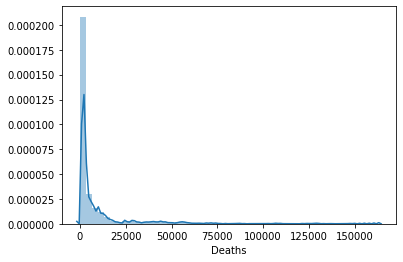

In [32]:
sns.distplot(data_1['Deaths'])

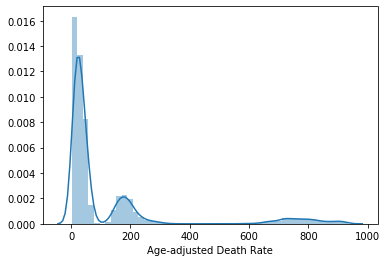

In [33]:
q = data_1['Age-adjusted Death Rate'].quantile(0.99)
data_2 = data[data['Age-adjusted Death Rate']<q]
sns.distplot(data_2['Age-adjusted Death Rate'])

In [34]:
log_death = np.log(data['Deaths'])

In [35]:
data['log_death'] = log_death

In [36]:
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,log_death
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4,12.043177
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8,7.902118
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7,6.077642
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2,8.339023
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8,7.393263


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Year','Deaths','Age-adjusted Death Rate']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values , i) for i in range (variables.shape[1])]
vif["Features"] = variables.columns

In [38]:
vif

,VIF,Features
0,1.325250,Year
1,1.076213,Deaths
2,1.399952,Age-adjusted Death Rate


Hypothesis Testing

In [39]:
# Converting categorical values to labels using Label Encoder

le = LabelEncoder()
data['Year'] = le.fit_transform(data['Year'])
data['Cause Name'] = le.fit_transform(data['Cause Name'])
data['State'] = le.fit_transform(data['State'])

In [40]:
# Normalizing the numerical values
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
data['Deaths'] = sc.fit_transform(np.array(data['Deaths']).reshape(-1,1))

In [41]:
# Dropping '113 Cause Name' because we already have 'Cause Name'
data.drop('113 Cause Name', axis = 1, inplace=True)

In [42]:
data.columns

Index(['Year', 'Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate',
       'log_death'],
      dtype='object')

In [43]:
# Using all the other fields as independent fields
X = data.drop('Age-adjusted Death Rate', axis=1)
y = data['Age-adjusted Death Rate']

X = sm.add_constant(X) # adding a constant

Since this is a Multiple Linear Regression, We need to know the importance of variables(significance) with respect to the hypothesis. To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff (0.05 is the general cut off for 95% significance) then we can say with confidence that a variable is significant. 

In [44]:
# Fitting the ordinary least square model
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

In [45]:
# Model summary
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     Age-adjusted Death Rate   R-squared:                       0.495
Model:                                 OLS   Adj. R-squared:                  0.495
Method:                      Least Squares   F-statistic:                     2129.
Date:                     Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                             14:51:43   Log-Likelihood:                -70504.
No. Observations:                    10868   AIC:                         1.410e+05
Df Residuals:                        10862   BIC:                         1.411e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Here we can see that all variables are significant as the p value is less than 0.05

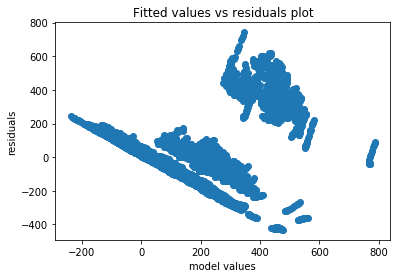

In [46]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('model values')
plt.ylabel('residuals')
plt.title('Fitted values vs residuals plot');

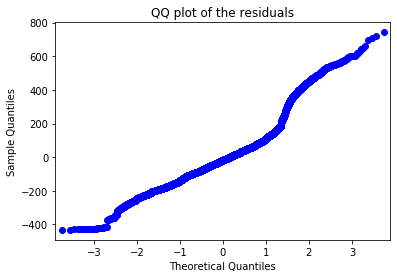

In [47]:
sm.qqplot(model.resid)
plt.title('QQ plot of the residuals');

Creating a Machine Learning Model

In [48]:
# Creating target variable y and Independent variables X

X = data.drop('Age-adjusted Death Rate', axis=1)
y = data['Age-adjusted Death Rate']

In [49]:
# train test splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Linear Regression Model

In [50]:
# Fitting the Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Making predictions on the test set

preds_lr = lr.predict(X_test)
preds_lr

array([438.53493804,  27.7718581 , 280.60019229, ..., 106.56656405,
       236.48543354, 422.94936063])

In [52]:
y_test.shape

(3587,)

 A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.

In [53]:
# Calculating root mean squared error as this is a Regression problem

print("Root mean squared error score of Logistic Regression is : ", np.sqrt(mean_squared_error(y_test, preds_lr)))

Root mean squared error score of Logistic Regression is :  161.0946518520185


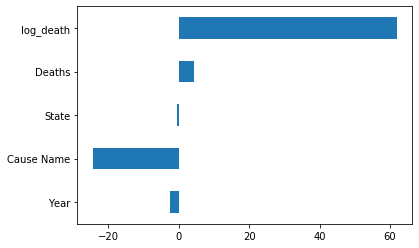

In [54]:
feat_importances = pd.Series(lr.coef_, index=X.columns)
feat_importances.plot(kind='barh')

In [55]:
lr.score(X_train,y_train)

0.4912968200551197

Random Forest Regression Model

In [56]:
# Fitting the Random Forest Regression Model

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
# Making predictions on the test set

preds_rf = rf.predict(X_test)

In [58]:
# Calculating root mean squared error as this is a Regression problem

print("Root mean squared error score of Random Forest Regression is : ", np.sqrt(mean_squared_error(y_test, preds_rf)))

Root mean squared error score of Random Forest Regression is :  11.662016827783113


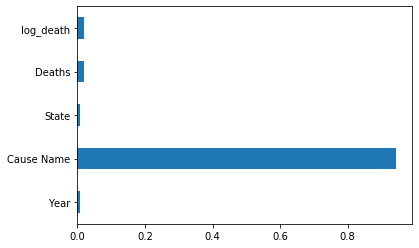

In [59]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [60]:
rf.score(X_train,y_train)

0.9996697824361709

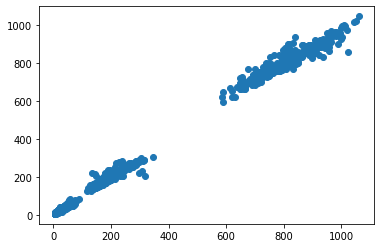

In [61]:
plt.scatter(y_test,preds_rf)

Xgboost Regression Model

In [62]:
# Fitting the Xgboost Regression Model

xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [68]:
# Making predictions on the test set

preds_xgb = xg.predict(X_test)

In [69]:
# Calculating root mean squared error as this is a Regression problem

print("Root mean squared error score of Xgboost Regression is : ", np.sqrt(mean_squared_error(y_test, preds_xgb)))

Root mean squared error score of Xgboost Regression is :  7.606230953932435


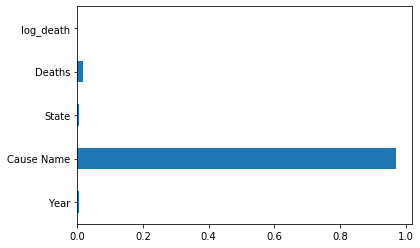

In [70]:
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

In [71]:
xg.score(X_train,y_train)

0.9997968062542385

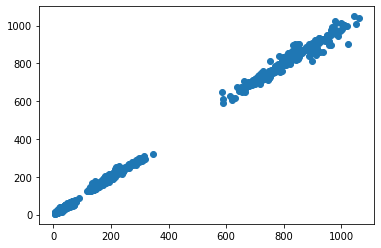

In [72]:
plt.scatter(y_test,preds_xgb)

HyperParameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of Xgboost 
param_grid = {
    'gamma': [0, 0.1, 0.01],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [100, 200, 300, 500, 1000]
}
# Create a Regressor based model
xg = xgb.XGBRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [74]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.6min finished


{'gamma': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 1000}


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [75]:
# Performing predictions using the best fit estimator params
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
print("Root mean squared error score of Xgboost Forest tuned Regression is : ", np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))

Root mean squared error score of Xgboost Forest tuned Regression is :  6.128916033765895


Hence using hyperparameter tuning, we reduced the error from 7.606 to 6.13